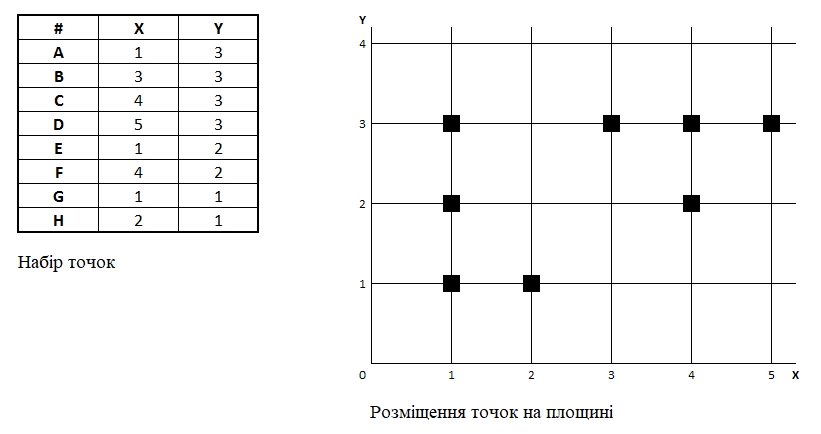

In [1]:
import numpy as np
import math as m

# точки
a = (1, 3)
b = (3, 3)
c = (4, 3)
d = (5, 3)
e = (1, 2)
f = (4, 2)
g = (1, 1)
h = (2, 1)

voc = [a, b, c, d, e, f, g, h]

# центроїди кластерів
k1 = [1,1]
k2 = [2,1]

# майбутній масив з даними
distance = np.empty((8, 4), dtype=object)

# майбутнє розрахування похибки
mistake = 0
mistake_s = []

for j in range(800):
    # необхідні змінні для обчислення нових координат центроїдів
    count1 = 0
    count2 = 0
    new_k1 = [0,0]
    new_k2 = [0,0]
    
    for i in range(len(voc)):
        pos2 = voc[i]
        
        # відстань від точки до центру к1
        dist_k1 = round(m.sqrt(pow((k1[0] - pos2[0]), 2) + pow((k1[1] - pos2[1]), 2)), 2)  
        
        # відстань від точки до центру к2
        dist_k2 = round(m.sqrt(pow((k2[0] - pos2[0]), 2) + pow((k2[1] - pos2[1]), 2)), 2)   
        
        # наповнюємо таблицю значеннями формату [х-координата, у-координата, найменша відстань, до центроїду] 
        if dist_k1 > dist_k2:                 
            distance[i, 0] = voc[i][0]
            distance[i, 1] = voc[i][1]
            distance[i, 2] = dist_k2
            distance[i, 3] = 2
        else:
            distance[i, 0] = voc[i][0]
            distance[i, 1] = voc[i][1]
            distance[i, 2] = dist_k1
            distance[i, 3] = 1
            
        # обчислюємо похибку методом найменших квадратів
        mistake += pow(distance[i, 2], 2)      
        mistake = round(mistake, 2)

        # змінюємо координати центроїдів
        if distance[i, 3] == 1:
            new_k1[0] += distance[i, 0]
            new_k1[1] += distance[i, 1]
            count1 += 1
        if distance[i, 3] == 2:
            new_k2[0] += distance[i, 0]
            new_k2[1] += distance[i, 1]
            count2 += 1
        
    k1[0] = new_k1[0]/count1
    k1[1] = new_k1[1]/count1
    
    k2[0] = new_k2[0]/count2
    k2[1] = new_k2[1]/count2
    
    # вираховуємо необхідніть наступної ітерації
    # якщо похибка змінилась несуттєво - прериваємо цикл
    mistake_s.append(mistake)
    diff = (mistake_s[j] - mistake_s[j - 1]) / mistake_s[0]
    if diff < 0.173 and j > 1:
        break

print('Координата центроїду першого кластеру:', k1)
print('Координата центроїду другого кластеру:', k2)





Координата центроїду першого кластеру: [1.25, 1.75]
Координата центроїду другого кластеру: [4.0, 2.75]


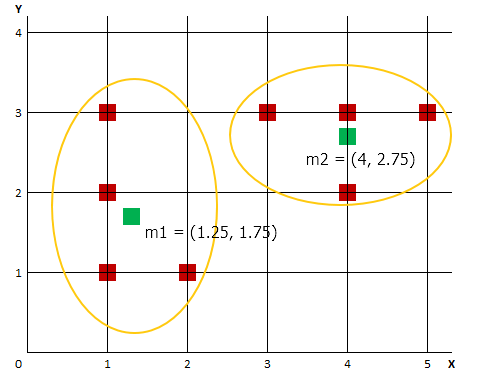